<a href="https://colab.research.google.com/github/sandhyashinde06/repo/blob/main/Sandhya_ML_Projecyt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
'''This is the ML project for Sandhya Vilas Shinde
The problem statement defined here is to predict if the patient will be treated for their mental illness depending on the analysis and prediction modleing techniques
on the dataset available'''

#link to database file:  'https://github.com/sandhyashinde06/repo/blob/main/Mental_Health_Survey.csv'
#importing libraries and loading the dataset
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

# Input data files are available in the in the current folder.

#reading in CSV's
mental_health_df = pd.read_csv('Mental_Health_Survey.csv')


In [160]:
#The file has been loaded

#Understanding: what is the data row count?
print(mental_health_df.shape)


(1259, 27)


In [161]:
#Understanding: whats the distribution of the data?
print(mental_health_df.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [162]:
#Understanding: What types of data do we have?
print(mental_health_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [163]:
#trying to find out the missing data from the data set
total = mental_health_df.isnull().sum().sort_values(ascending=False)
percent = (mental_health_df.isnull().sum()/mental_health_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [164]:
#Trying to remove Null values/empty or missing data data
#Dropping columns "Timestamp",“comments”, “state” as they do not help with any solutions towards the problem statement
mental_health_df = mental_health_df.drop(['comments'], axis= 1)
mental_health_df = mental_health_df.drop(['state'], axis= 1)
mental_health_df = mental_health_df.drop(['Timestamp'], axis= 1)

mental_health_df.isnull().sum().max() #cross check for validating no missing data
mental_health_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [165]:
# Assign default value for every data type
defaultInt_value = 0
defaultString_value = 'NaN'
defaultFloat_value = 0.0

# Create lists by data type from the datasets available in the sheet
intFeatures_value = ['Age']
stringFeatures_value = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures_value = []

# Clean NaN
for feature in mental_health_df:
    if feature in intFeatures_value:
        mental_health_df[feature] = mental_health_df[feature].fillna(defaultInt_value)
    elif feature in stringFeatures_value:
        mental_health_df[feature] = mental_health_df[feature].fillna(defaultString_value)
    elif feature in floatFeatures_value:
        mental_health_df[feature] = mental_health_df[feature].fillna(defaultFloat_value)
    else:
        print('Error: Feature %s not recognized.' % feature)
mental_health_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [166]:
#cleaning 'Gender' printing all values in lower case
Gender = mental_health_df['Gender'].str.lower()
print(Gender)

0       female
1            m
2         male
3         male
4         male
         ...  
1254      male
1255      male
1256      male
1257         f
1258      male
Name: Gender, Length: 1259, dtype: object


In [167]:
#Select unique values
Gender = mental_health_df['Gender'].unique()

#making gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in mental_health_df.iterrows():
    if str.lower(col.Gender) in male_str:
        mental_health_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if str.lower(col.Gender) in female_str:
          mental_health_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if str.lower(col.Gender) in trans_str:
        mental_health_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#removing unwanted values
stk_list = ['A little about you', 'p']
mental_health_df = mental_health_df[~mental_health_df['Gender'].isin(stk_list)]

print(mental_health_df['Gender'].unique())

['female' 'male' 'trans']


In [168]:
#adding missing age with mean of all the ages
mental_health_df['Age'].fillna(mental_health_df['Age'].median(), inplace = True)

# Fill with median() values < 18 and > 120
s = pd.Series(mental_health_df['Age'])
s[s<18] = mental_health_df['Age'].median()
mental_health_df['Age'] = s
s = pd.Series(mental_health_df['Age'])
s[s>120] = mental_health_df['Age'].median()
mental_health_df['Age'] = s

#Age range
mental_health_df['age_range'] = pd.cut(mental_health_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [169]:
#Since the percentage of self employed as only 0.014% so we would keep the NaN value and change it to readable format as NOT self_employed
#Replace "NaN" string from defaultString_value
mental_health_df['self_employed'] = mental_health_df['self_employed'].replace([defaultString_value], 'No')
print(mental_health_df['self_employed'].unique())

['No' 'Yes']


In [170]:
#Sinnce there are only 0.20% of self work_interfere values so we change NaN to "Don't know
#Replace "NaN" string from defaultString

mental_health_df['work_interfere'] = mental_health_df['work_interfere'].replace([defaultString_value], 'Don\'t know' )
print(mental_health_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [171]:
#Encoding data
labelDict = {}
for feature in mental_health_df:
    le = preprocessing.LabelEncoder()
    le.fit(mental_health_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    mental_health_df[feature] = le.transform(mental_health_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

#Dropping rid of 'Country' as it does not help in analysis
mental_health_df = mental_health_df.drop(['Country'], axis= 1)
mental_health_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [172]:
#Finally corss checking for any missing data after data mining and clenaing process
total = mental_health_df.isnull().sum().sort_values(ascending=False)
percent = (mental_health_df.isnull().sum()/mental_health_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

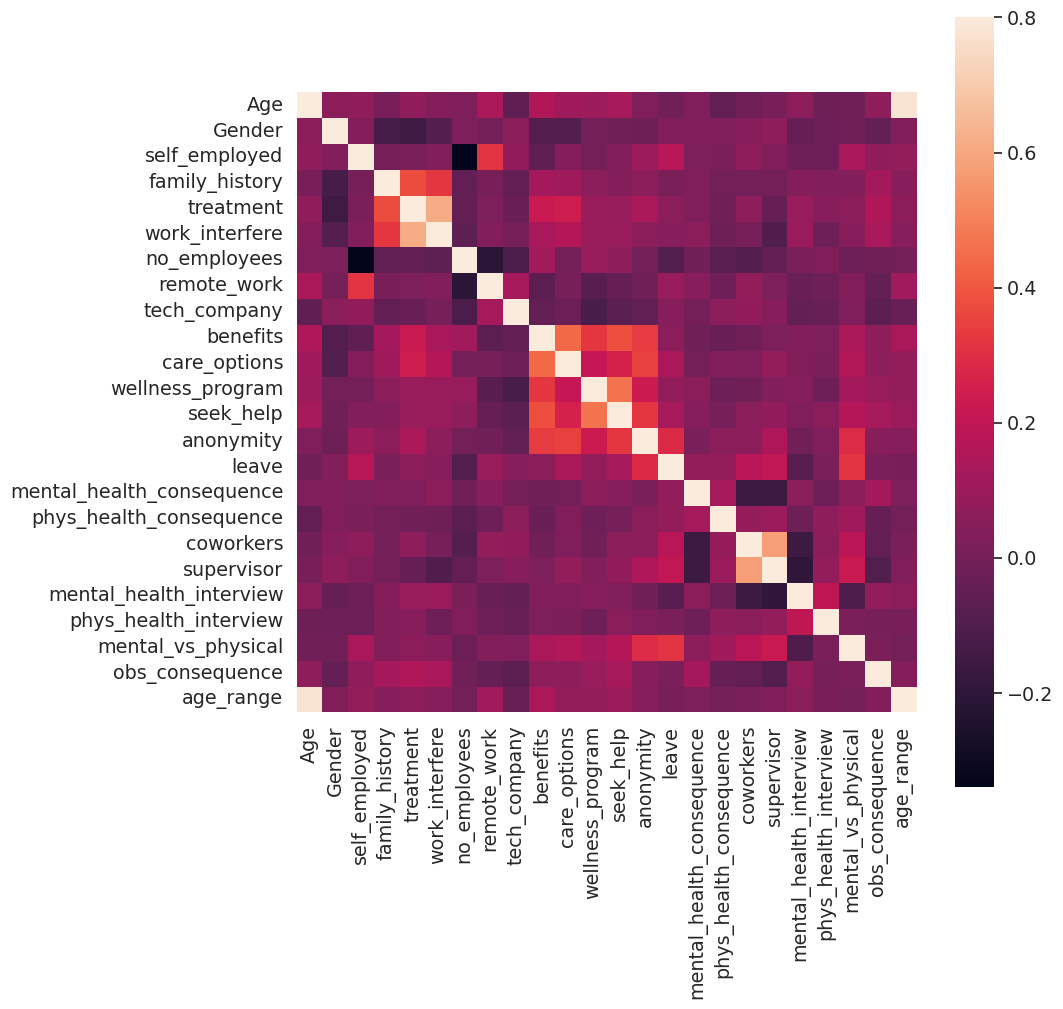

In [173]:
import seaborn as sns
#correlation matrix
corrmat =mental_health_df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

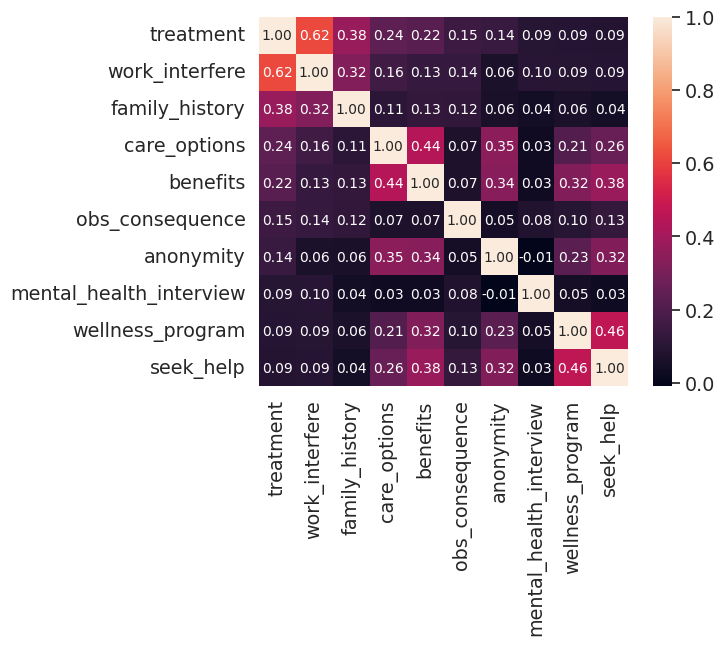

In [174]:
#correlation matrix for treatment
k = 10
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(mental_health_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Text(0.5, 0, 'Age')

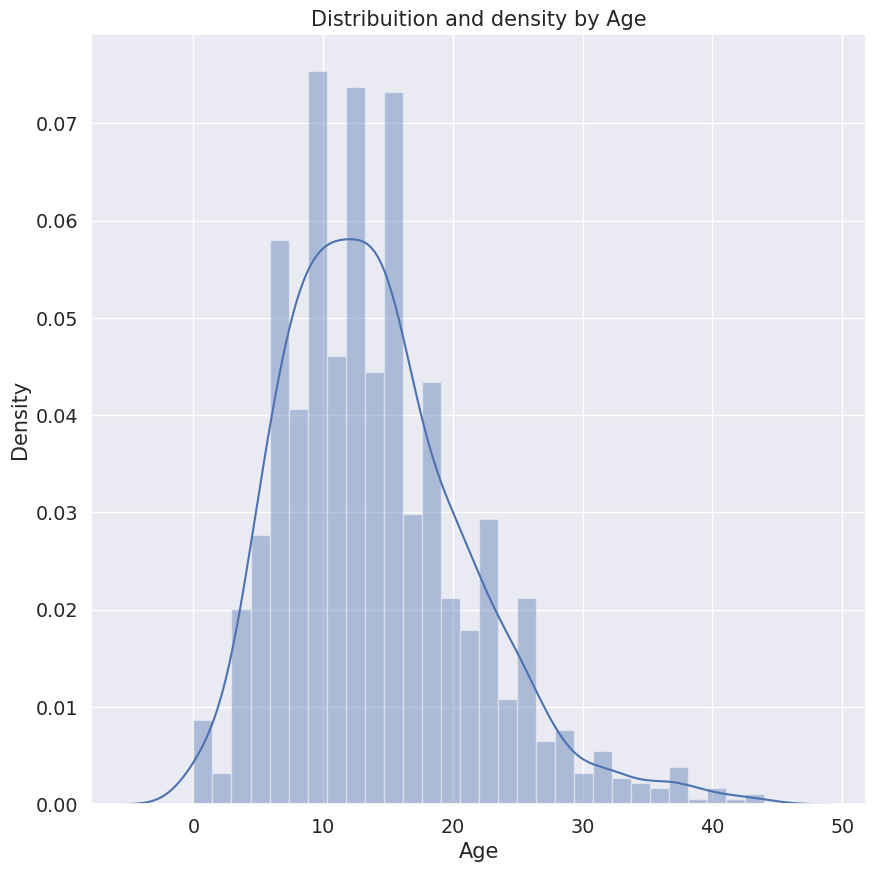

In [175]:
# Distribiution of density and Age
plt.figure(figsize=(10,10))
sns.distplot(mental_health_df["Age"], bins=30)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

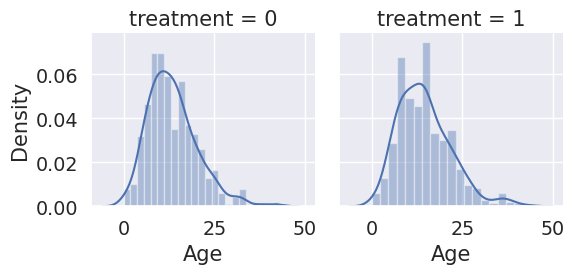

In [176]:
# treatment available or not
g = sns.FacetGrid(mental_health_df, col='treatment')
g = g.map(sns.distplot, "Age")

Text(0.5, 1.0, 'Total Distribuition of treated people')

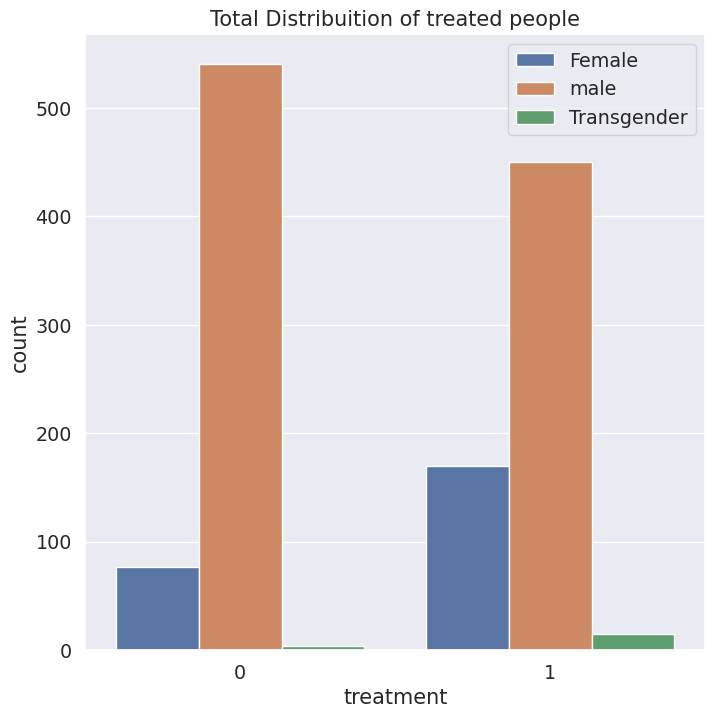

In [177]:
# Total number of people been treated
plt.figure(figsize=(8,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", hue='Gender', data=mental_health_df)
legend_handles, _= g.get_legend_handles_labels()
g.legend(legend_handles, ['Female','male','Transgender'], bbox_to_anchor=(1,1))
#g.set_xticklabels(labels)

plt.title('Total Distribuition of treated people')

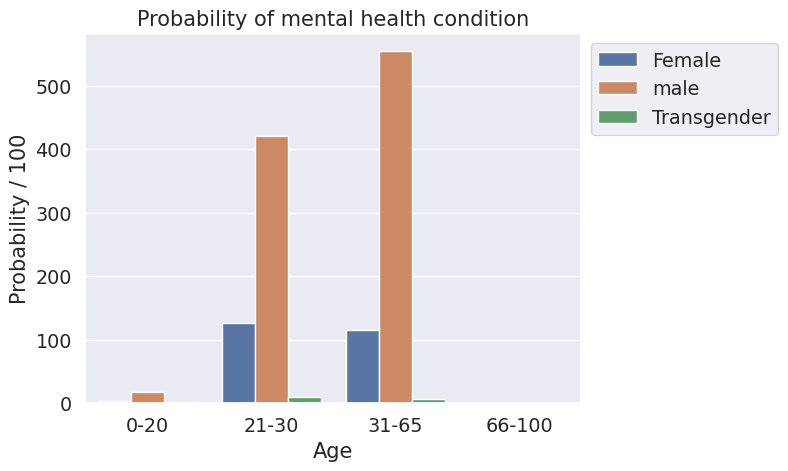

In [178]:
#plotting a nested barplot to show probabilities for sex and class
import matplotlib.pyplot as plt
import seaborn as sns
o = labelDict['label_age_range']

g = sns.countplot(x="age_range", hue="Gender", data=mental_health_df)
legend_handles, _= g.get_legend_handles_labels()
g.legend(legend_handles, ['Female','male','Transgender'], bbox_to_anchor=(1,1))
g.set_xticklabels(o)


plt.title('Probability of mental health condition')
plt.ylabel('Probability / 100')
plt.xlabel('Age')

plt.show()

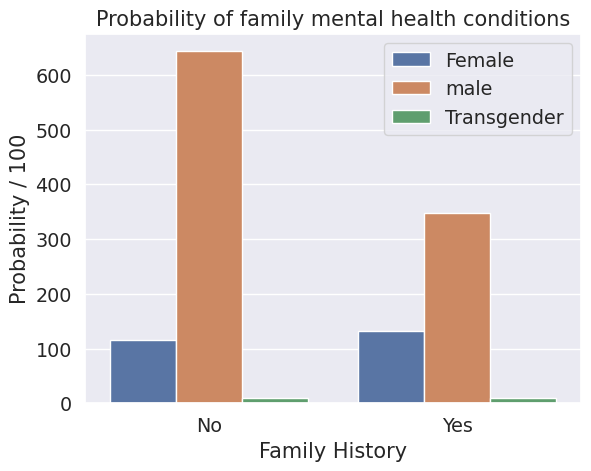

In [179]:
#Plot to see probabilities of family history
import matplotlib.pyplot as plt
import seaborn as sns

o = labelDict['label_family_history']
g = sns.countplot(x="family_history", hue="Gender", data=mental_health_df)
legend_handles, _= g.get_legend_handles_labels()
g.legend(legend_handles, ['Female','male','Transgender'], bbox_to_anchor=(1,1))
g.set_xticklabels(o)
plt.title('Probability of family mental health conditions')
plt.ylabel('Probability / 100')
plt.xlabel('Family History')

plt.show()

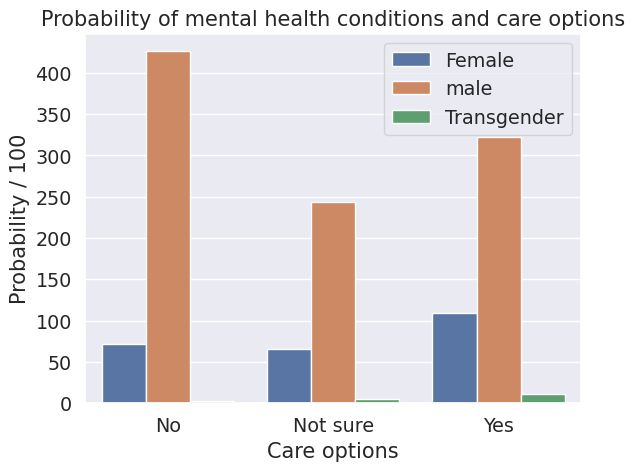

In [181]:
#Plot to show if any care options are available
import matplotlib.pyplot as plt
import seaborn as sns

o = labelDict['label_care_options']
g = sns.countplot(x="care_options", hue="Gender", data=mental_health_df)
legend_handles, _= g.get_legend_handles_labels()
g.legend(legend_handles, ['Female','male','Transgender'], bbox_to_anchor=(1,1))
g.set_xticklabels(o)
plt.title('Probability of mental health conditions and care options')
plt.ylabel('Probability / 100')
plt.xlabel('Care options')

plt.show()

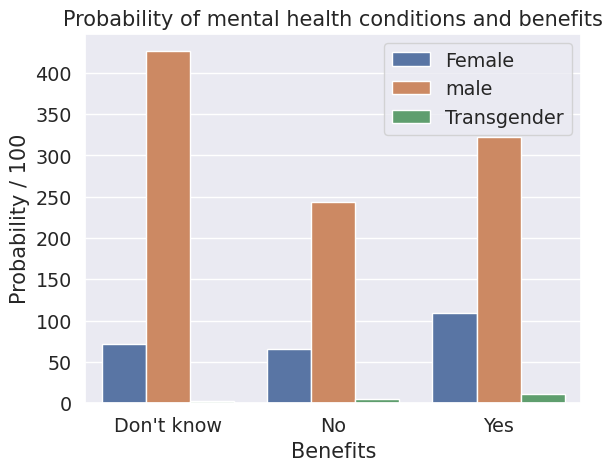

In [182]:
#Plot to see the probabilities of benefits
import matplotlib.pyplot as plt
import seaborn as sns

o = labelDict['label_benefits']
g = sns.countplot(x="care_options", hue="Gender", data=mental_health_df)
legend_handles, _= g.get_legend_handles_labels()
g.legend(legend_handles, ['Female','male','Transgender'], bbox_to_anchor=(1,1))
g.set_xticklabels(o)
plt.title('Probability of mental health conditions and benefits')
plt.ylabel('Probability / 100')
plt.xlabel('Benefits')

plt.show()

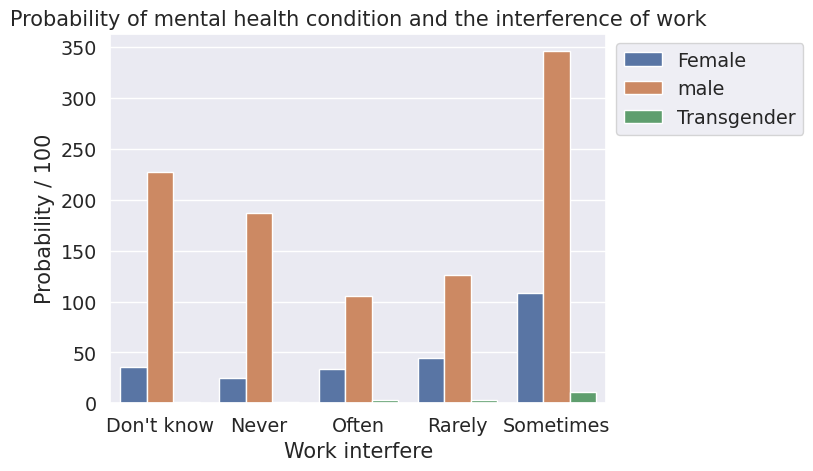

In [183]:
#Plot to see if there are any work interferences between the mental health illness and care conditions

o = labelDict['label_work_interfere']
g = sns.countplot(x="work_interfere", hue="Gender", data=mental_health_df)
legend_handles, _= g.get_legend_handles_labels()
g.legend(legend_handles, ['Female','male','Transgender'], bbox_to_anchor=(1,1))
g.set_xticklabels(o)
plt.title('Probability of mental health condition and the interference of work')
plt.ylabel('Probability / 100')
plt.xlabel('Work interfere')

plt.show()

In [184]:
#Now we would scale the age as they have different ranges and we would need one factor to opt from as we cannot have range values for our paratmeters to decide
#Scalling age would help us to make proper decisions and help find solutions

scaler = MinMaxScaler()
mental_health_df['Age'] = scaler.fit_transform(mental_health_df[['Age']])
mental_health_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [206]:
#Trying to split the database to fix on a model to use for decision making
# define x and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = mental_health_df[feature_cols]
y = mental_health_df.treatment

# spliting X and y as training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# forming a dictionary for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

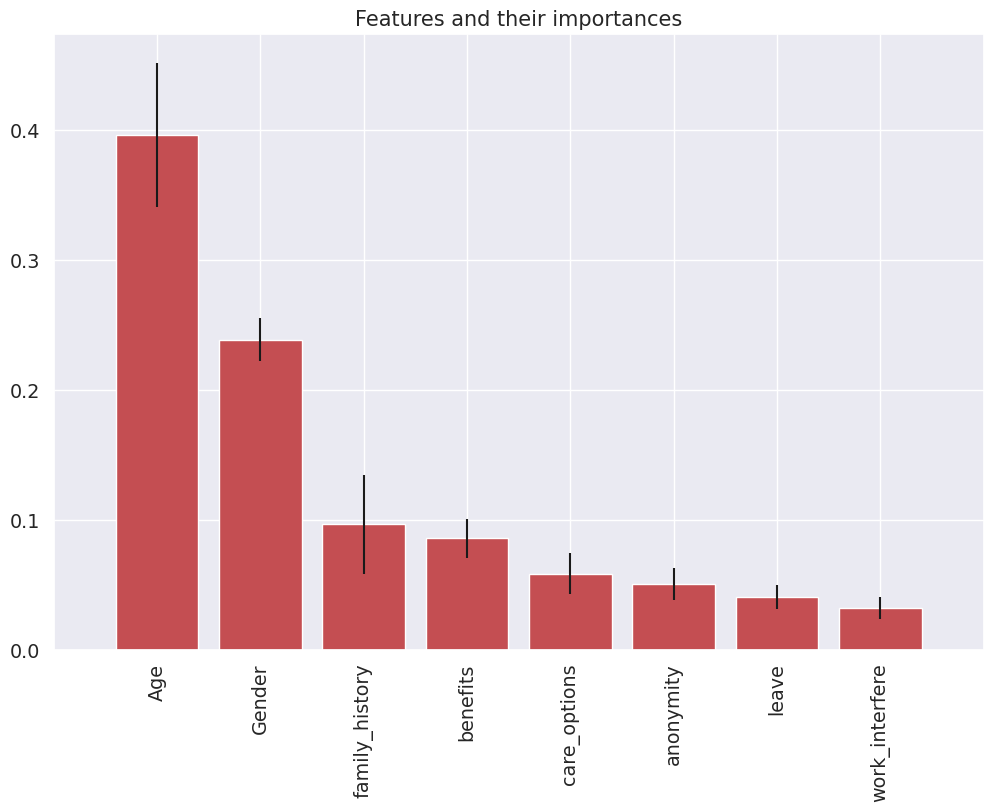

In [207]:
# We create a forest chart and compute it to find the feature and their importances which help in decision making and factors to consider
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Features and their importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


In [213]:
'''Trying to evaluate the classification model which will help us with findin the null accuracies, the pecentage of ones and zeros, confusion matrix that will help us iwth
defining the performace of the classification model, although classification is the easiest way of understanding but it '''
#Definding KNN model
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)      #Predict test data set.
y_pred = knn.predict(X_test) #Checking performance our model with classification report.
print(mean_squared_error(y_test,y_pred))
roc_auc_score(y_test, y_pred)


0.19576719576719576


0.8046588459277095

In [218]:
#Hyper parameter tuning

leaf_size = list(range(1,8))
n_neighbors = list(range(1,8))

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)

knn_2 = KNeighborsClassifier()#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)#Fit the model
best_model = clf.fit(X_train,y_train) #Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 4
Best n_neighbors: 7


In [220]:
#Running KNN model
knn = KNeighborsClassifier(n_neighbors = 7, leaf_size= 4)

knn.fit(X_train, y_train)      #Predict test data set.
y_pred = knn.predict(X_test) #Checking performance our model with classification report.
print(mean_squared_error(y_test,y_pred))
roc_auc_score(y_test, y_pred)

0.1931216931216931


0.8073886384634767

In [222]:
#Random forest
rf = RandomForestClassifier()

#rf_random = RandomizedSearchCV()# Fit the random search model
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))
print(mean_squared_error(y_test,y_pred_rf))


0.8042328042328042
0.19576719576719576


In [223]:
random_grid = {'n_estimators': [2,4,6,8], 'max_depth': [2,4,6,8]}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid)# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'n_estimators': 4, 'max_depth': 4}

In [224]:
rf = RandomForestClassifier(n_estimators= 4, max_depth = 4)

#rf_random = RandomizedSearchCV()# Fit the random search model
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))
print(mean_squared_error(y_test,y_pred_rf))

0.7724867724867724
0.2275132275132275
